In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#한글 쓰기1
import matplotlib.font_manager as fm
import matplotlib as mpl
mpl.rcParams['font.family'] = 'GyeonggiBatang'
mpl.rcParams['axes.unicode_minus'] = False

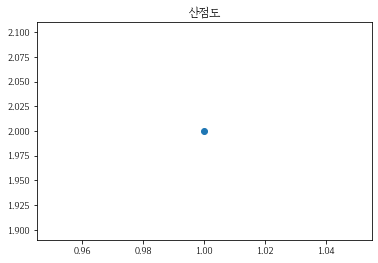

In [4]:
plt.scatter(1, 2)
plt.title('산점도')
plt.show()

In [7]:
popcsv = pd.read_csv('../_data/행정구역_시군구_별__성별_인구수_20211029104519.csv', encoding = 'cp949')

In [114]:
popcity = popcsv[['행정구역(시군구)별','2021. 07']][2:10]
popcity.columns = ['시도', '인구']
popcity

,시도,인구
2,서울특별시,9558153
3,부산광역시,3361781
4,대구광역시,2395749
5,인천광역시,2937440
6,광주광역시,1442482
7,대전광역시,1455300
8,울산광역시,1125727
9,세종특별자치시,364364


In [55]:
gpsxls = pd.read_excel('../_data/행정_법정동 중심좌표.xlsx')

In [115]:
gpscity = gpsxls[['시도', '위도', '경도']]
gpscity.head()

,시도,위도,경도
0,서울특별시,37.584009,126.970626
1,서울특별시,37.575408,126.965944
2,서울특별시,37.590758,126.980996
3,서울특별시,37.594768,126.965574
4,서울특별시,37.613029,126.974485


In [226]:
popgps = popcity.merge(gpscity, how = 'inner').groupby('시도').min()
popgps

,인구,위도,경도
시도,,,
광주광역시,1442482,35.054641,126.659374
대구광역시,2395749,35.620628,128.349012
대전광역시,1455300,36.216518,127.257924
부산광역시,3361781,35.011799,128.815823
서울특별시,9558153,37.446848,126.775768
세종특별자치시,364364,36.419531,127.148470
울산광역시,1125727,35.347682,129.014419
인천광역시,2937440,37.025743,124.638333


In [245]:
popgps.describe()

,위도,경도
count,8.000000,8.000000
mean,36.017924,127.332390
std,0.910692,1.420433
min,35.011799,124.638333
25%,35.274422,126.746669
50%,35.918573,127.203197
75%,36.571084,128.465715
max,37.446848,129.014419


In [274]:
pops = popgps['인구'].astype('float') / 10000
len(pops)
#colors = 'rgbcmkyr'
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'navy', 'purple', 'black']
cmap = 'jet'

### 산점도 scatter
* 분포와 크기 정보를 동시에 전달
* 옵션
    - x, y
    - s : 사이즈
    - c : 컬러
    - alpha : 투명도

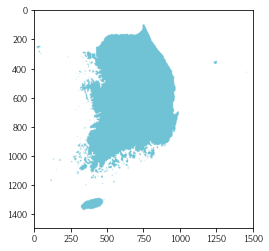

In [211]:
img = plt.imread('../_data/skorea.png')
plt.imshow(img)

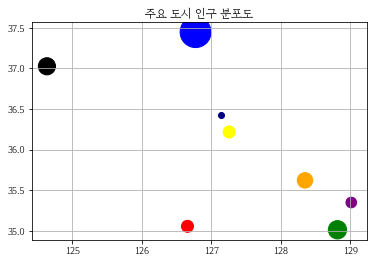

In [275]:
rex = popgps['경도']
rey = popgps['위도']
plt.scatter(rex, rey, s = pops, c = colors)
plt.title('주요 도시 인구 분포도')
plt.grid()
plt.show()

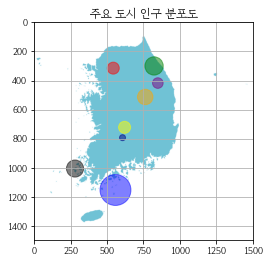

In [276]:
fig, ax = plt.subplots()
img = plt.imread('../_data/skorea.png')
ax.imshow(img, 'bwr')
rex = (popgps['경도'] - 124.638333) * 130 + 280
rey = (popgps['위도'] - 35.011799) * 350 + 300
ax.scatter(rex, rey, s = pops, c = colors, alpha = 0.5)
ax.set_title('주요 도시 인구 분포도')
ax.grid()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1494, 1506, 4)
시도
광주광역시      542.73533
대구광역시      762.38827
대전광역시      620.54683
부산광역시      823.07370
서울특별시      557.86655
세종특별자치시    606.31781
울산광역시      848.89118
인천광역시      280.00000
Name: 경도, dtype: float64
시도
광주광역시       314.99470
대구광역시       513.09015
대전광역시       721.65165
부산광역시       300.00000
서울특별시      1152.26715
세종특별자치시     792.70620
울산광역시       417.55905
인천광역시      1004.88040
Name: 위도, dtype: float64


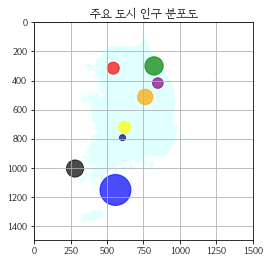

In [300]:
fig, ax = plt.subplots()
img = plt.imread('../_data/skorea.png')
nimg = np.array(img)
print(nimg.shape)
ax.imshow(nimg * 2)
rex = (popgps['경도'] - 124.638333) * 130 + 280
rey = (popgps['위도'] - 35.011799) * 350 + 300
orders = np.arange(len(popgps))
ax.scatter(rex, rey, s = pops, c = colors, cmap = plt.cm.autumn, alpha = 0.7)
for r in (rex, rey):
    print(r)
ax.set_title('주요 도시 인구 분포도')
ax.grid()
plt.show()

<BarContainer object of 8 artists>

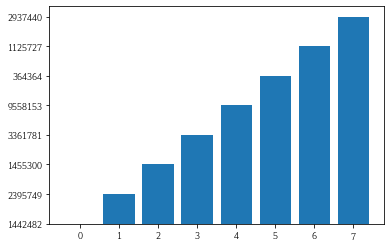

In [280]:
orders = np.arange(len(popgps))
plt.bar(orders, popgps['인구'].values)

In [281]:
popint = popgps['인구'].astype('int')

In [290]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'navy', 'purple', 'black']

### barplot
* plt.bar(x,
*         y, 
*         color : 컬러,
*         tick_label : x축 값
*         width : 세로 막대 폭 사이즈
*         height : 가로 막대 폭 사이즈)
* plt.barh : 가로바 그래프

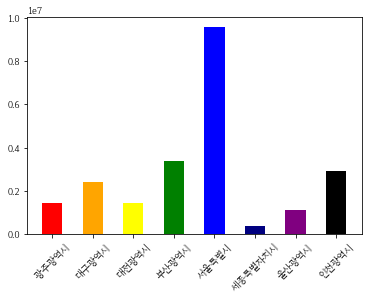

In [291]:
orders = np.arange(len(popgps))
plt.bar(orders, popint.values, 
        color = colors, 
        tick_label = popint.index,
        width = 0.5)
plt.xticks(rotation = 45)
plt.title('세로 막대 그래프')
plt.show()

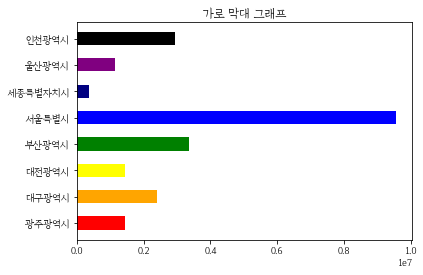

In [299]:
orders = np.arange(len(popgps))
plt.barh(orders, popint.values, 
        color = colors, 
        tick_label = popint.index,
        height = 0.5)
# plt.yticks(rotation = 45)
plt.title('가로 막대 그래프')
plt.show()